# 原始数据

Text(0.5, 1.0, 'Histogram of cost')

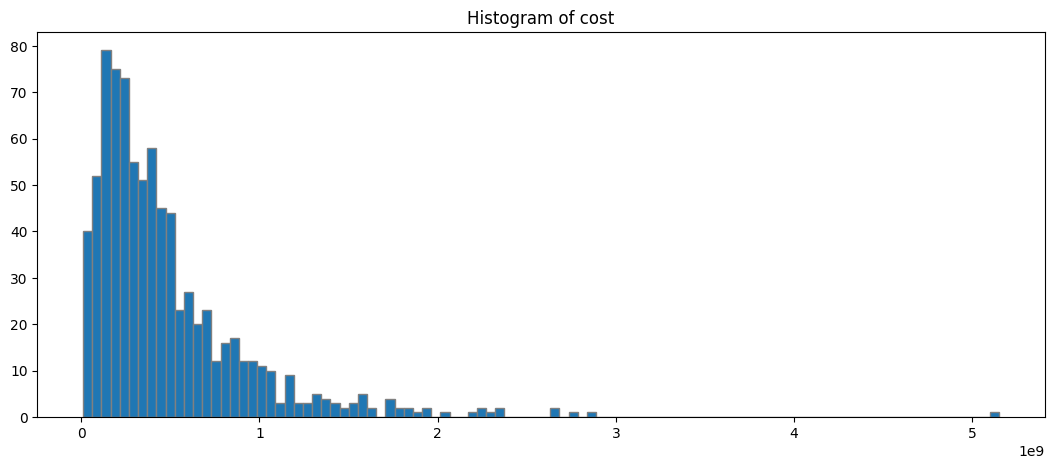

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series

df = pd.read_excel('抹平极值.xlsx')
fig, ax = plt.subplots(1, 1, figsize=(13, 5))
bins = ax.hist(df['指标值（元）'], bins=100, edgecolor='grey')
ax.set_title('Histogram of cost')

# MAD法

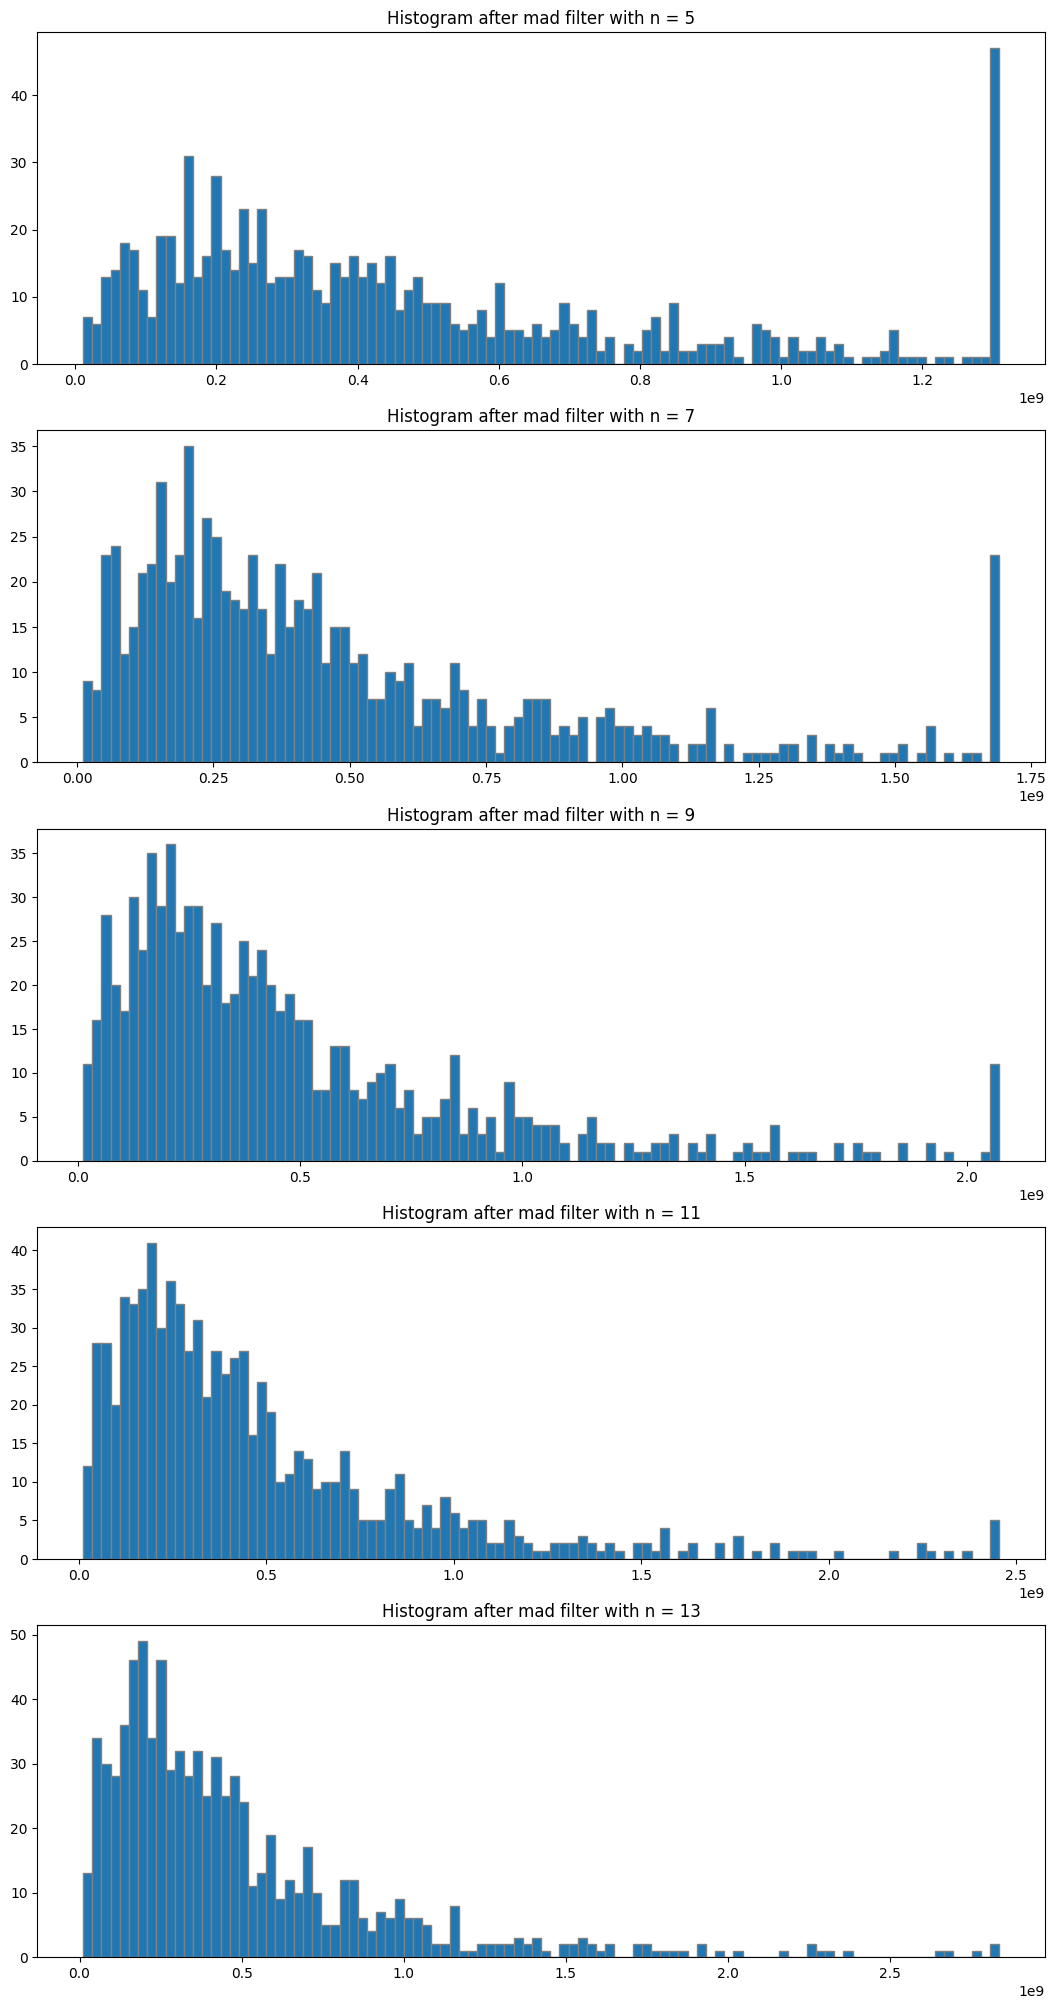

In [58]:
def filter_extreme_mad(x: Series, n):
    median = x.quantile(0.5)
    new_median = ((x - median).abs()).quantile(0.5)
    max_range = median + n * new_median
    min_range = median - n * new_median
    return np.clip(x, min_range, max_range)
fig, axes = plt.subplots(5, 1, figsize=(13, 25))
for ax, i in zip(axes, [5, 7, 9, 11, 13]):
    df_filtered = filter_extreme_mad(df['指标值（元）'], i)
    ax.hist(df_filtered, bins = 100, edgecolor='grey')
    ax.set_title(f'Histogram after mad filter with n = {i}')

# 百分位法

Text(0.5, 1.0, 'Histogram after percentile filter with n = 13')

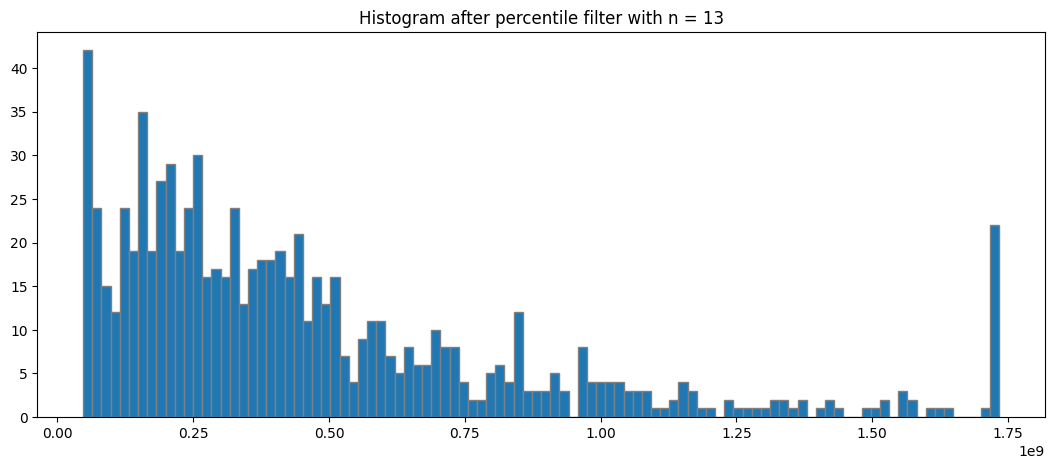

In [59]:
def filter_extreme_percentile(x, min=0.025, max=0.975):
    quantiles = x.quantile([min, max])
    return np.clip(x, quantiles[min], quantiles[max])
fig, ax = plt.subplots(figsize=(13, 5))
df_filtered = filter_extreme_percentile(df['指标值（元）'])
ax.hist(df_filtered, bins = 100, edgecolor='grey')
ax.set_title(f'Histogram after percentile filter with n = {i}')


# 3σ法

min count: 18
max count: 0


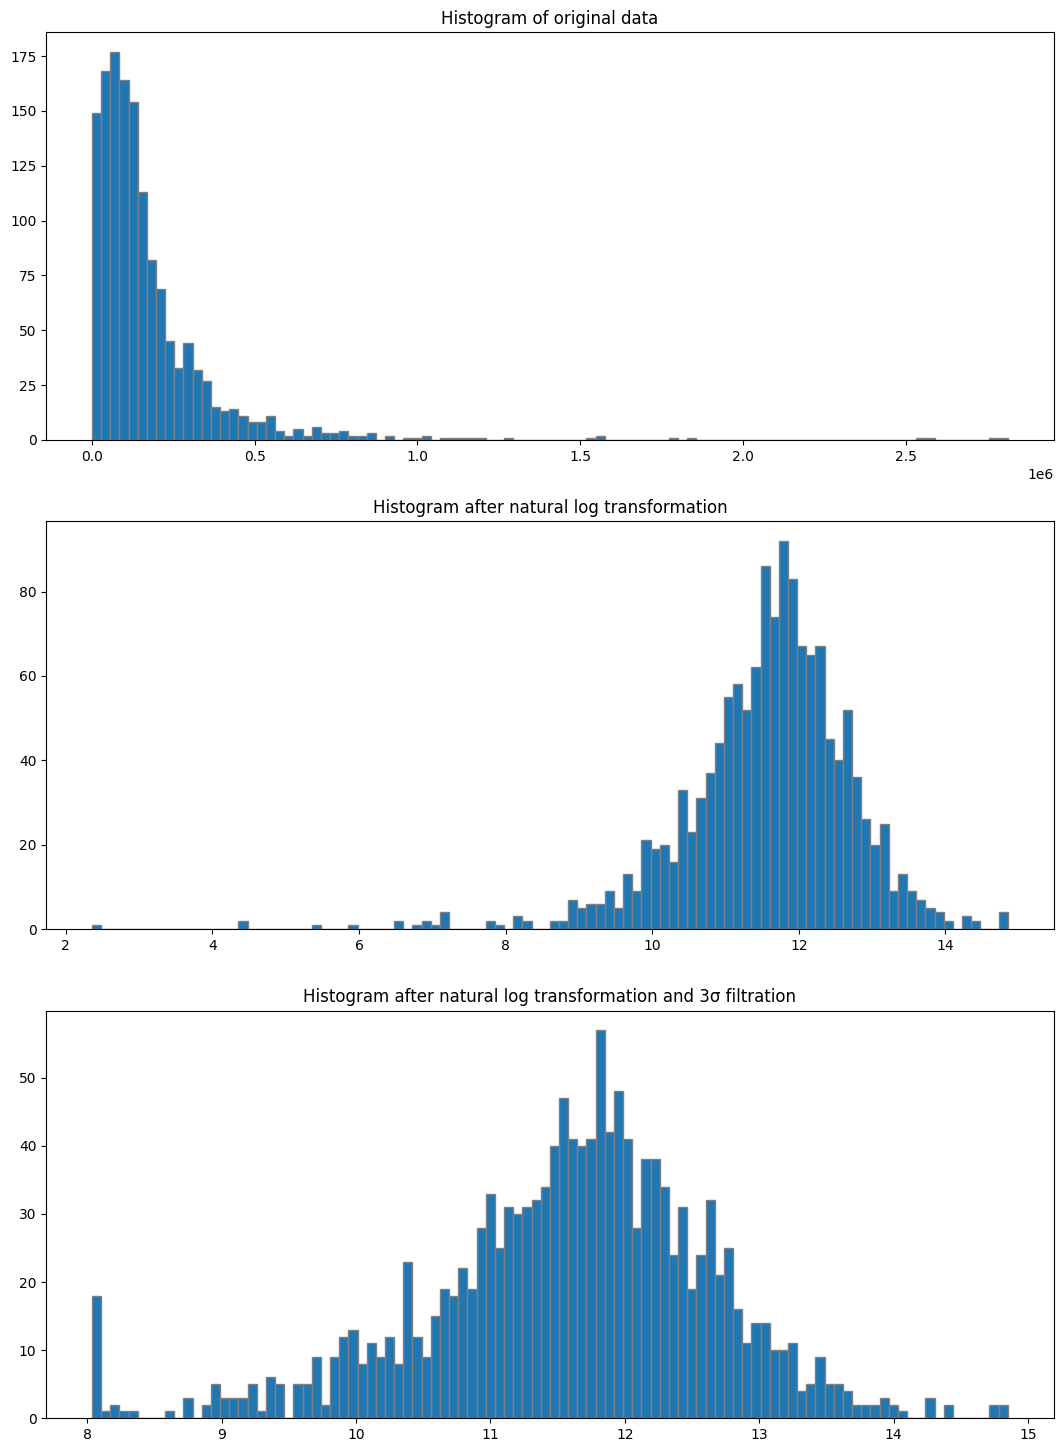

In [60]:
# 设定pandas的float类型显示精度
pd.set_option('display.float_format',lambda x : '%.2f' % x)
data = pd.read_excel('C:/Users/JackWu/Desktop/度电营销成本(售电量)-带SQL.xlsx')
target_name = '售电量(千瓦时)'
filter_col = '单位简称'
# 转换数据格式
data[target_name] = data[target_name].astype(float)
# 剔除空数据和小于等于0的数据
data = data[(data[target_name] > 0) & (data[filter_col].notnull())]
y = data[target_name]
# data = pd.read_excel('抹平极值.xlsx')
# y = data['指标值（元）']
def filter_extreme_3sigma(x: Series, n=3):
    mean = x.mean()
    std = x.std()
    max_range = mean + n * std
    min_range = mean - n * std
    return np.clip(x, min_range, max_range), len(x[x < min_range]), len(x[x > max_range])
# 对数缩放
y_scaled = np.log(y)
# 修剪极值
y_filtered, min_count, max_count = filter_extreme_3sigma(y_scaled)
fig, axes = plt.subplots(3, 1, figsize=(13, 18))
axes[0].hist(y, bins = 100, edgecolor='grey')
axes[0].set_title(f'Histogram of original data')
axes[1].hist(y_scaled, bins = 100, edgecolor='grey')
axes[1].set_title(f'Histogram after natural log transformation')
axes[2].hist(y_filtered, bins = 100, edgecolor='grey')
axes[2].set_title(f'Histogram after natural log transformation and 3σ filtration')
print(f'min count: {min_count}')
print(f'max count: {max_count}')


In [61]:
# 归一化
y_normalized = (y_filtered - y_filtered.min()) / (y_filtered.max() - y_filtered.min())
bins = [0, 0.25, 0.5, 0.75, 1]
y_bin_cut = pd.cut(y_normalized, bins=bins, include_lowest=True)

y_bin_counts = y_bin_cut.value_counts().sort_index()
print(y_bin_counts)
# print(y_bin_counts[pd.Interval(-0.001, 0.25, closed='right')])
print([int(x.right * 4) for x in y_bin_cut])

(-0.001, 0.25]     79
(0.25, 0.5]       465
(0.5, 0.75]       776
(0.75, 1.0]        74
Name: 售电量(千瓦时), dtype: int64
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

In [62]:
y_bin_indices = [int(x.right * 4) for x in y_bin_cut]
data['对数缩放'] = y_scaled
data['修剪极值'] = y_filtered
data['归一化'] = y_normalized
data['分组'] = y_bin_indices
# print(data.to_string())

<BarContainer object of 4 artists>

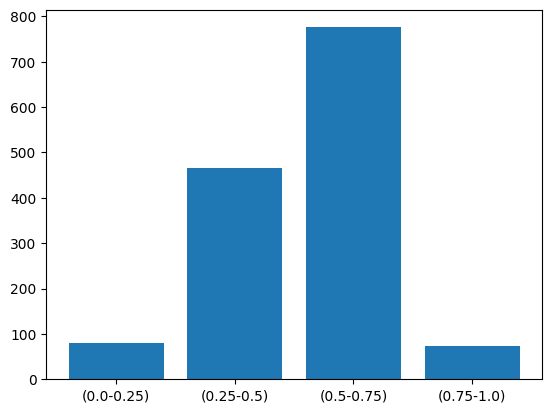

In [63]:
fig, ax = plt.subplots()
ax.bar([f'({i}-{i + 0.25})' for i in np.arange(0, 0.76, 0.25)], y_bin_cut.value_counts().sort_index().to_list())